In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import os

In [4]:
from datetime import datetime

In [ ]:
#Andiamo su http://www.datiopen.it/it/opendata/Mappa_dei_pub_circoli_locali_in_Italia e scarichiamo il file (in formato JSON) della mappa dei pub, circoli e locali in Italia Nota: per leggerlo nella funzione open() dovremo aggiungere il parametro encoding="latin1", ad esempio: f = open(file_path, "r", encoding="latin1") dove file_path è chiaramente la posizione del file nel nostro calcolatore.

In [ ]:
from google.colab import files
uploaded = files.upload()

import json

with open("Mappa-dei-pub-circoli-locali-in-Italia.json", "r", encoding="latin1") as f:
  data = json.load(f)


Saving Mappa-dei-pub-circoli-locali-in-Italia.json to Mappa-dei-pub-circoli-locali-in-Italia.json


In [ ]:
#Esaminiamo il dataset Mappa-dei-pub-circoli-locali-in-Italia.json: • quanti dati ci sono in totale? • quali sono i metadati? • stampiamo il primo elemento • stampiamo l'ultimo elemento • riusciamo a stampare un elemento a caso? • quali sono gli anni di inserimento presenti? • quante attività ci sono nel quadrato di longitudine 9-10 e latitudine 45-46? • quante attività ci sono nella provincia di Vicenza? • quante enoteche ci sono, e come si chiamano? 3 • quante attività ci sono in Lazio e Abruzzo assieme?

In [ ]:
# Quanti dati ci sono in totale?
print("Numero totale di dati:", len(data))

# Quali sono i metadati?
file_path = "Mappa-dei-pub-circoli-locali-in-Italia.json"  # Store the file path
file_info = os.stat(file_path)

# Estrazione dei metadati
metadati = {
    'Nome del file': os.path.basename(file_path),  # Use file_path here
    'Percorso del file': os.path.dirname(file_path),  # Use file_path here
    'Dimensione del file (in byte)': file_info.st_size,
    'Ultima data di accesso': datetime.fromtimestamp(file_info.st_atime).isoformat(),
    'Ultima data di modifica': datetime.fromtimestamp(file_info.st_mtime).isoformat(),
    'Data di creazione': datetime.fromtimestamp(file_info.st_ctime).isoformat(),
    'Data di ultima modifica': datetime.fromtimestamp(file_info.st_mtime).isoformat(),
    'Numero di record nel JSON': len(data)
}

# Stampa i metadati
for chiave, valore in metadati.items():
    print(f"{chiave}: {valore}")

# Stampiamo il primo elemento
print("\nPrimo elemento:")
print(data[0])

# Stampiamo l'ultimo elemento
print("\nUltimo elemento:")
print(data[-1])

# Stampiamo un elemento a caso
import random
random_index = random.randint(0, len(data) - 1)
print("\nElemento casuale:")
print(data[random_index])

# Stampa i valori di "canno_inserimento"
anni_inserimento = []
for item in data:
  canno_inserimento = item.get("canno_inserimento")
  if canno_inserimento not in anni_inserimento:
    anni_inserimento.append(canno_inserimento)
print("\nAnni di inserimento:", anni_inserimento)

# Quante attività "cnome" ci sono nel quadrato di "clongitudine" 9-10 e "clatitudine" 45-46?
count_attività = 0
for item in data:
    longitudine = float(item.get("clongitudine"))
    latitudine = float(item.get("clatitudine"))
    if 9 <= longitudine <= 10 and 45 <= latitudine <= 46:
        count_attività += 1
print("\nAttività nel quadrato 9-10 longitudine e 45-46 latitudine:", count_attività)

# Quante attività "cnome" ci sono nella "cprovincia" di Vicenza?
count_vicenza = 0
for item in data:
    if item.get("cprovincia") == "VICENZA":
        count_vicenza += 1
print("\nAttività nella provincia di Vicenza:", count_vicenza)

# Quante attività "cnome" enoteche ci sono, e quali valori hanno?
count_enoteche = 0
nomi_enoteche = []
for item in data:
    if "ENOTECA" in item.get("cnome", "").upper():
        count_enoteche += 1
        nomi_enoteche.append(item.get("cnome"))
print("\nNumero di enoteche:", count_enoteche)
print("Nomi delle enoteche:", nomi_enoteche)

Numero totale di dati: 2497
Nome del file: Mappa-dei-pub-circoli-locali-in-Italia.json
Percorso del file: 
Dimensione del file (in byte): 744819
Ultima data di accesso: 2024-09-04T07:00:40.424584
Ultima data di modifica: 2024-09-04T07:00:40.422584
Data di creazione: 2024-09-04T07:00:40.422584
Data di ultima modifica: 2024-09-04T07:00:40.422584
Numero di record nel JSON: 2497

Primo elemento:
{'ccomune': 'ALTRO', 'cprovincia': 'ALTRO', 'cregione': 'ALTRO', 'cnome': '', 'canno_inserimento': '2011', 'cdata_e_ora_inserimento': '2011-06-25T23:17:43Z', 'cidentificatore_in_openstreetmap': '1339088150', 'clongitudine': '13.733257', 'clatitudine': '45.5758303'}

Ultimo elemento:
{'ccomune': 'Trani (BT)', 'cprovincia': 'BARLETTA ANDRIA TRANI', 'cregione': 'Puglia', 'cnome': "Well's Fargo", 'canno_inserimento': '2009', 'cdata_e_ora_inserimento': '2009-08-10T12:44:03Z', 'cidentificatore_in_openstreetmap': '387223648', 'clongitudine': '16.4367655', 'clatitudine': '41.2672644'}

Elemento casuale:
{'

In [ ]:
#Carichiamo in un DataFrame il dataset iris.csv dei beginner_datasets e calcoliamo: • La media della lunghezza dei petali di tutto il dataset • La media della lunghezza dei petali per ogni specie di Iris, utilizzando il metodo .groupby() • Media, minimo e massimo della larghezza dei sepali per ogni specie, utilizzando .groupby() e .agg()

In [ ]:
import pandas as pd
from google.colab import files

# Upload the file to the Colab environment
uploaded = files.upload()

Saving Iris.csv to Iris (3).csv


In [ ]:
# Read the file into a DataFrame, making sure the filename matches exactly
iris_df = pd.read_csv("Iris.csv")  # Make sure this filename is correct

In [ ]:
# Calcola la media della lunghezza dei petali di tutto il dataset
media_lunghezza_petali = iris_df["PetalLengthCm"].mean()
print("Media della lunghezza dei petali:", media_lunghezza_petali)


Media della lunghezza dei petali: 3.758666666666666


In [ ]:
# Calcola la media della lunghezza dei petali per ogni specie di Iris
media_lunghezza_petali_per_specie = iris_df.groupby("Species")["PetalLengthCm"].mean()
print("\nMedia della lunghezza dei petali per specie:")
print(media_lunghezza_petali_per_specie)



Media della lunghezza dei petali per specie:
Species
Iris-setosa        1.464
Iris-versicolor    4.260
Iris-virginica     5.552
Name: PetalLengthCm, dtype: float64


In [ ]:
# Calcola media, minimo e massimo della larghezza dei sepali per ogni specie
statistiche_larghezza_sepali = iris_df.groupby("Species")["SepalWidthCm"].agg(["mean", "min", "max"])
print("\nStatistiche della larghezza dei sepali per specie:")
print(statistiche_larghezza_sepali)



Statistiche della larghezza dei sepali per specie:
                  mean  min  max
Species                         
Iris-setosa      3.418  2.3  4.4
Iris-versicolor  2.770  2.0  3.4
Iris-virginica   2.974  2.2  3.8


In [ ]:
#Nei beginner_datasets, il dataset wine.csv contiene delle analisi organolettiche su diverse qualità di vini: • Qual è la media di concentrazione alcolica per ogni qualità? Ci sono differenze? E rispetto alla media totale? • C'è differenza nella concentrazione alcolica per vini bianchi e vini rossi? • Rifacendo le analisi delle domande precedenti ma per il pH, cambia qualcosa? • E per i solfati?

In [ ]:
from google.colab import files

# Upload the file to the Colab environment
uploaded = files.upload()

Saving winequality_red.xlsx to winequality_red.xlsx


In [ ]:
from google.colab import files

# Upload the file to the Colab environment
uploaded = files.upload()

Saving winequality_white.xlsx to winequality_white.xlsx


In [ ]:
# Read the file into a DataFrame, making sure the filename matches exactly
wine_white = pd.read_excel("winequality_white.xlsx")
wine_red = pd.read_excel("winequality_red.xlsx")

In [ ]:
# Calcola la media della concentrazione alcolica per ogni qualità (vino bianco)
media_alcol_per_qualita_white = wine_white.groupby("qualityw")["alcoholw"].mean()
print("Media della concentrazione alcolica per qualità (vino bianco):")
print(media_alcol_per_qualita_white)

# Calcola la media della concentrazione alcolica per ogni qualità (vino rosso)
media_alcol_per_qualita_red = wine_red.groupby("qualityr")["alcoholr"].mean()
print("\nMedia della concentrazione alcolica per qualità (vino rosso):")
print(media_alcol_per_qualita_red)

# Calcola la media totale della concentrazione alcolica (vino bianco)
media_alcol_totale_white = wine_white["alcoholw"].mean()
print("\nMedia totale della concentrazione alcolica (vino bianco):", media_alcol_totale_white)

# Calcola la media totale della concentrazione alcolica (vino rosso)
media_alcol_totale_red = wine_red["alcoholr"].mean()
print("Media totale della concentrazione alcolica (vino rosso):", media_alcol_totale_red)

for quality, alcohol_mean in media_alcol_per_qualita_white.items():
    white_diff = alcohol_mean - media_alcol_totale_white
    print(f"Differenza tra media della concentrazione alcolica per qualità {quality} (vino bianco) e media totale (vino bianco): {white_diff}")
for quality, alcohol_mean in media_alcol_per_qualita_red.items():
    red_diff = alcohol_mean - media_alcol_totale_red
    print(f"Differenza tra media della concentrazione alcolica per qualità {quality} (vino rosso) e media totale (vino rosso): {red_diff}")


Media della concentrazione alcolica per qualità (vino bianco):
qualityw
3    10.345000
4    10.152454
5     9.808840
6    10.575372
7    11.367936
8    11.636000
9    12.180000
Name: alcoholw, dtype: float64

Media della concentrazione alcolica per qualità (vino rosso):
qualityr
3     9.955000
4    10.265094
5     9.899706
6    10.629519
7    11.465913
8    12.094444
Name: alcoholr, dtype: float64

Media totale della concentrazione alcolica (vino bianco): 10.51426704777011
Media totale della concentrazione alcolica (vino rosso): 10.422983114446529
Differenza tra media della concentrazione alcolica per qualità 3 (vino bianco) e media totale (vino bianco): -0.16926704777010926
Differenza tra media della concentrazione alcolica per qualità 4 (vino bianco) e media totale (vino bianco): -0.3618130600400491
Differenza tra media della concentrazione alcolica per qualità 5 (vino bianco) e media totale (vino bianco): -0.705426965407721
Differenza tra media della concentrazione alcolica per qual

In [ ]:
# Calcola le statistiche descrittive per la concentrazione di alcol nei vini bianchi
descrizione_alcol_bianchi = wine_white['alcoholw'].describe()
print("\nStatistiche descrittive per la concentrazione di alcol nei vini bianchi:")
print(descrizione_alcol_bianchi)

# Calcola le statistiche descrittive per la concentrazione di alcol nei vini rossi
descrizione_alcol_rossi = wine_red['alcoholr'].describe()
print("\nStatistiche descrittive per la concentrazione di alcol nei vini rossi:")
print(descrizione_alcol_rossi)



Statistiche descrittive per la concentrazione di alcol nei vini bianchi:
count    4898.000000
mean       10.514267
std         1.230621
min         8.000000
25%         9.500000
50%        10.400000
75%        11.400000
max        14.200000
Name: alcoholw, dtype: float64

Statistiche descrittive per la concentrazione di alcol nei vini rossi:
count    1599.000000
mean       10.422983
std         1.065668
min         8.400000
25%         9.500000
50%        10.200000
75%        11.100000
max        14.900000
Name: alcoholr, dtype: float64


In [ ]:

media_pH_per_qualita_white = wine_white.groupby("qualityw")["pHw"].mean()
print("Media del pH per qualità (vino bianco):")
print(media_pH_per_qualita_white)

media_pH_per_qualita_red = wine_red.groupby("qualityr")["pHr"].mean()
print("\nMedia del pH per qualità (vino rosso):")
print(media_pH_per_qualita_red)

media_pH_totale_white = wine_white["pHw"].mean()
print("\nMedia totale del pH (vino bianco):", media_pH_totale_white)

media_pH_totale_red = wine_red["pHr"].mean()
print("Media totale del pH (vino rosso):", media_pH_totale_red)

for quality, pH_mean in media_pH_per_qualita_white.items():
    white_diff = pH_mean - media_pH_totale_white
    print(f"Differenza tra media del pH per qualità {quality} (vino bianco) e media totale (vino bianco): {white_diff}")
for quality, pH_mean in media_pH_per_qualita_red.items():
    red_diff = pH_mean - media_alcol_totale_red
    print(f"Differenza tra media del pH per qualità {quality} (vino rosso) e media totale (vino rosso): {red_diff}")

Media del pH per qualità (vino bianco):
qualityw
3    3.187500
4    3.182883
5    3.168833
6    3.188599
7    3.213898
8    3.218686
9    3.308000
Name: pHw, dtype: float64

Media del pH per qualità (vino rosso):
qualityr
3    3.398000
4    3.381509
5    3.304949
6    3.318072
7    3.290754
8    3.267222
Name: pHr, dtype: float64

Media totale del pH (vino bianco): 3.1882666394446715
Media totale del pH (vino rosso): 3.3111131957473416
Differenza tra media del pH per qualità 3 (vino bianco) e media totale (vino bianco): -0.0007666394446714797
Differenza tra media del pH per qualità 4 (vino bianco) e media totale (vino bianco): -0.005383203861849761
Differenza tra media del pH per qualità 5 (vino bianco) e media totale (vino bianco): -0.01943342050163821
Differenza tra media del pH per qualità 6 (vino bianco) e media totale (vino bianco): 0.00033208666997808223
Differenza tra media del pH per qualità 7 (vino bianco) e media totale (vino bianco): 0.025631087828055676
Differenza tra media

In [ ]:

descrizione_pH_bianchi = wine_white['pHw'].describe()
print("\nStatistiche descrittive per il pH nei vini bianchi:")
print(descrizione_pH_bianchi)

descrizione_pH_rossi = wine_red['pHr'].describe()
print("\nStatistiche descrittive per il pH nei vini rossi:")
print(descrizione_pH_rossi)


Statistiche descrittive per il pH nei vini bianchi:
count    4898.000000
mean        3.188267
std         0.151001
min         2.720000
25%         3.090000
50%         3.180000
75%         3.280000
max         3.820000
Name: pHw, dtype: float64

Statistiche descrittive per il pH nei vini rossi:
count    1599.000000
mean        3.311113
std         0.154386
min         2.740000
25%         3.210000
50%         3.310000
75%         3.400000
max         4.010000
Name: pHr, dtype: float64


In [ ]:
#Nei beginner_datasets, il file boston.csv contiene il Boston Housing Dataset, che deriva dalle informazioni raccolte dal Census Service degli Stati Uniti sulle abitazioni nell'area di Boston. Di seguito vengono descritte le colonne del dataset: • CRIM - tasso di criminalità pro capite per città • ZN - proporzione di terreni residenziali suddivisi in zone per lotti superiori a 25.000 piedi quadrati. • INDUS - percentuale di acri di attività commerciali non al dettaglio per città. • CHAS - variabile dummy del fiume Charles (1 se il tratto costeggia il fiume; 0 altrimenti)#NOX - concentrazione di ossidi di azoto (parti per 10 milioni). • RM - numero medio di stanze per abitazione • AGE - proporzione di unità abitative occupate da proprietari costruite prima del 1940 • DIS - distanze ponderate da cinque centri occupazionali di Boston • RAD - indice di accessibilità alle autostrade radiali • TAX - aliquota dell'imposta fondiaria sul valore pieno per 10.000 dollari • PTRATIO - rapporto alunni-insegnanti per città • BLACK - la percentuale di neri per città • LSTAT - % di popolazione di condizione più bassa 8 • MEDV - Valore mediano delle case, espresso in migliaia di dollari

In [ ]:
from google.colab import files

# Upload the file to the Colab environment
uploaded = files.upload()

Saving Boston.xlsx to Boston.xlsx


In [ ]:
# Read the file into a DataFrame, making sure the filename matches exactly
boston = pd.read_excel("Boston.xlsx")

In [ ]:
#La media del prezzo delle case cambia a seconda della distanza dal fiume Charles? • Si nota una correlazione tra il tasso di criminalità e il valore delle abitazioni? Come si può spiegare il risultato? • Qual è la media del numero di stanze (rm) rispetto al rapporto alunni-insegnanti (ptratio)? E del valore delle case (medv)? Appare esserci una qualche correlazione? Come si può spiegare il risultato? • Rispetto all'accessibilità alle autostrade, cambia qualcosa la media delle età delle abitazioni? E del numero di stanze? E delle tasse?

In [ ]:
# Raggruppa i dati in base alla vicinanza al fiume Charles e calcola la media del prezzo delle case
media_prezzo_per_fiume = boston.groupby("chas")["medv"].mean()

# Sostituisci i valori 0 e 1 con etichette più descrittive
media_prezzo_per_fiume = media_prezzo_per_fiume.rename(index={0: "lontano dal fiume", 1: "vicino al fiume"})

print("\nMedia del prezzo delle case in base alla vicinanza al fiume Charles:")
print(media_prezzo_per_fiume)



Media del prezzo delle case in base alla vicinanza al fiume Charles:
chas
lontano dal fiume    22.093843
vicino al fiume      28.440000
Name: medv, dtype: float64



Correlazione tra il tasso di criminalità e il valore delle abitazioni: -0.38830460858681143
Esiste una correlazione negativa tra il tasso di criminalità e il valore delle abitazioni.
Questo significa che all'aumentare del tasso di criminalità, il valore delle abitazioni tende a diminuire.


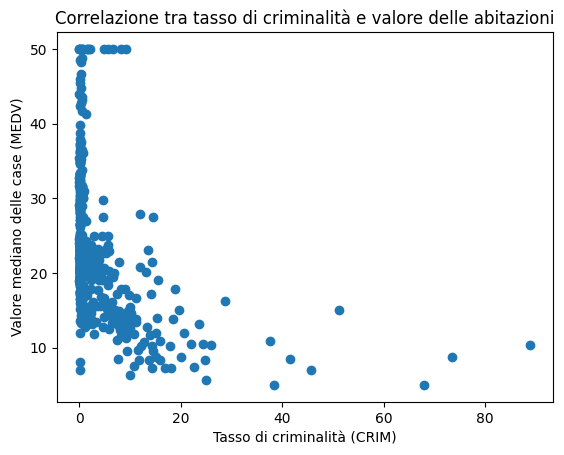


Possibili spiegazioni:
- I quartieri con un alto tasso di criminalità potrebbero avere un valore delle abitazioni inferiore a causa della minore desiderabilità e della percezione di rischio.
- Altri fattori potrebbero influenzare sia il tasso di criminalità che il valore delle abitazioni, come la posizione geografica, le condizioni socio-economiche e le infrastrutture.


In [ ]:
# Calcola la correlazione tra il tasso di criminalità (CRIM) e il valore delle abitazioni (MEDV)
correlazione_criminalita_valore = boston["crim"].corr(boston["medv"])

print("\nCorrelazione tra il tasso di criminalità e il valore delle abitazioni:", correlazione_criminalita_valore)

# Interpretazione del risultato
if correlazione_criminalita_valore < 0:
    print("Esiste una correlazione negativa tra il tasso di criminalità e il valore delle abitazioni.")
    print("Questo significa che all'aumentare del tasso di criminalità, il valore delle abitazioni tende a diminuire.")
elif correlazione_criminalita_valore > 0:
    print("Esiste una correlazione positiva tra il tasso di criminalità e il valore delle abitazioni.")
    print("Questo significa che all'aumentare del tasso di criminalità, il valore delle abitazioni tende ad aumentare.")
else:
    print("Non esiste una correlazione significativa tra il tasso di criminalità e il valore delle abitazioni.")

plt.scatter(boston["crim"], boston["medv"])
plt.xlabel("Tasso di criminalità (CRIM)")
plt.ylabel("Valore mediano delle case (MEDV)")
plt.title("Correlazione tra tasso di criminalità e valore delle abitazioni")
plt.show()

# Possibili spiegazioni del risultato
print("\nPossibili spiegazioni:")
print("- I quartieri con un alto tasso di criminalità potrebbero avere un valore delle abitazioni inferiore a causa della minore desiderabilità e della percezione di rischio.")
print("- Altri fattori potrebbero influenzare sia il tasso di criminalità che il valore delle abitazioni, come la posizione geografica, le condizioni socio-economiche e le infrastrutture.")



Media del numero di stanze per rapporto alunni-insegnanti:
ptratio
12.6    7.222667
13.0    7.406167
13.6    7.923000
14.4    7.875000
14.7    6.246235
14.8    6.752333
14.9    7.311250
15.1    6.816000
15.2    6.421923
15.3    6.705333
15.5    7.241000
15.6    6.702000
15.9    6.997000
16.0    6.230600
16.1    6.428800
16.4    6.139667
16.6    6.344188
16.8    6.146750
16.9    6.016400
17.0    6.868250
17.3    6.383000
17.4    7.212333
17.6    6.822429
17.8    6.496130
17.9    6.134818
18.0    7.218600
18.2    6.283000
18.3    6.520500
18.4    6.285938
18.5    6.288750
18.6    6.111588
18.7    6.406556
18.8    5.956000
18.9    5.785667
19.0    6.453750
19.1    6.234882
19.2    6.053632
19.6    6.224000
19.7    6.303250
20.1    5.585400
20.2    6.024021
20.9    6.266273
21.0    6.039778
21.1    5.888000
21.2    6.028533
22.0    5.799500
Name: rm, dtype: float64

Media del valore delle case per rapporto alunni-insegnanti:
ptratio
12.6    32.733333
13.0    38.025000
13.6    50.000000
14

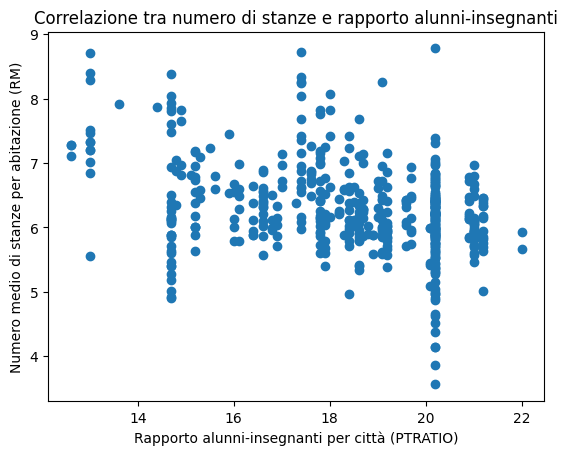

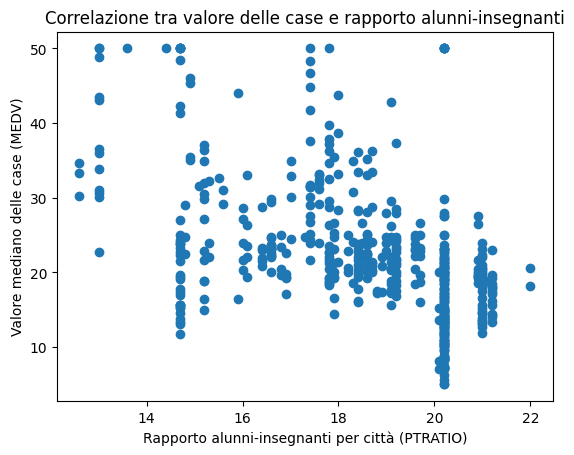


Interpretazione del risultato:
- Esiste una correlazione negativa tra il numero di stanze e il rapporto alunni-insegnanti.
- Questo potrebbe indicare che in aree con un rapporto alunni-insegnanti più elevato (più studenti per insegnante), le abitazioni tendono ad avere un numero medio di stanze inferiore.
- Esiste una correlazione negativa tra il valore delle case e il rapporto alunni-insegnanti.
- Questo potrebbe indicare che in aree con un rapporto alunni-insegnanti più elevato, il valore delle case tende a diminuire.

Possibili spiegazioni:
- Il rapporto alunni-insegnanti può essere un indicatore della qualità dell'istruzione in un'area.
- La qualità dell'istruzione può influenzare il valore delle case e il numero di stanze nelle abitazioni.
- Altri fattori potrebbero influenzare sia il rapporto alunni-insegnanti che il valore delle case e il numero di stanze, come la posizione geografica, le condizioni socio-economiche e le infrastrutture.


In [ ]:
# Calcola la media del numero di stanze (rm) rispetto al rapporto alunni-insegnanti (ptratio)
media_stanze_per_ptratio = boston.groupby("ptratio")["rm"].mean()
print("\nMedia del numero di stanze per rapporto alunni-insegnanti:")
print(media_stanze_per_ptratio)

# Calcola la media del valore delle case (medv) rispetto al rapporto alunni-insegnanti (ptratio)
media_valore_case_per_ptratio = boston.groupby("ptratio")["medv"].mean()
print("\nMedia del valore delle case per rapporto alunni-insegnanti:")
print(media_valore_case_per_ptratio)

# Calcola la correlazione tra il numero di stanze (rm) e il rapporto alunni-insegnanti (ptratio)
correlazione_stanze_ptratio = boston["rm"].corr(boston["ptratio"])
print("\nCorrelazione tra il numero di stanze e il rapporto alunni-insegnanti:", correlazione_stanze_ptratio)

# Calcola la correlazione tra il valore delle case (medv) e il rapporto alunni-insegnanti (ptratio)
correlazione_valore_case_ptratio = boston["medv"].corr(boston["ptratio"])
print("\nCorrelazione tra il valore delle case e il rapporto alunni-insegnanti:", correlazione_valore_case_ptratio)

# Visualizza la correlazione tra il numero di stanze e il rapporto alunni-insegnanti
plt.scatter(boston["ptratio"], boston["rm"])
plt.xlabel("Rapporto alunni-insegnanti per città (PTRATIO)")
plt.ylabel("Numero medio di stanze per abitazione (RM)")
plt.title("Correlazione tra numero di stanze e rapporto alunni-insegnanti")
plt.show()

# Visualizza la correlazione tra il valore delle case e il rapporto alunni-insegnanti
plt.scatter(boston["ptratio"], boston["medv"])
plt.xlabel("Rapporto alunni-insegnanti per città (PTRATIO)")
plt.ylabel("Valore mediano delle case (MEDV)")
plt.title("Correlazione tra valore delle case e rapporto alunni-insegnanti")
plt.show()

# Interpretazione del risultato
print("\nInterpretazione del risultato:")
if correlazione_stanze_ptratio < 0:
    print("- Esiste una correlazione negativa tra il numero di stanze e il rapporto alunni-insegnanti.")
    print("- Questo potrebbe indicare che in aree con un rapporto alunni-insegnanti più elevato (più studenti per insegnante), le abitazioni tendono ad avere un numero medio di stanze inferiore.")
elif correlazione_stanze_ptratio > 0:
    print("- Esiste una correlazione positiva tra il numero di stanze e il rapporto alunni-insegnanti.")
    print("- Questo potrebbe indicare che in aree con un rapporto alunni-insegnanti più elevato, le abitazioni tendono ad avere un numero medio di stanze superiore.")
else:
    print("- Non esiste una correlazione significativa tra il numero di stanze e il rapporto alunni-insegnanti.")

if correlazione_valore_case_ptratio < 0:
    print("- Esiste una correlazione negativa tra il valore delle case e il rapporto alunni-insegnanti.")
    print("- Questo potrebbe indicare che in aree con un rapporto alunni-insegnanti più elevato, il valore delle case tende a diminuire.")
elif correlazione_valore_case_ptratio > 0:
    print("- Esiste una correlazione positiva tra il valore delle case e il rapporto alunni-insegnanti.")
    print("- Questo potrebbe indicare che in aree con un rapporto alunni-insegnanti più elevato, il valore delle case tende ad aumentare.")
else:
    print("- Non esiste una correlazione significativa tra il valore delle case e il rapporto alunni-insegnanti.")

# Possibili spiegazioni del risultato
print("\nPossibili spiegazioni:")
print("- Il rapporto alunni-insegnanti può essere un indicatore della qualità dell'istruzione in un'area.")
print("- La qualità dell'istruzione può influenzare il valore delle case e il numero di stanze nelle abitazioni.")
print("- Altri fattori potrebbero influenzare sia il rapporto alunni-insegnanti che il valore delle case e il numero di stanze, come la posizione geografica, le condizioni socio-economiche e le infrastrutture.")



Correlazione tra accessibilità alle autostrade e media delle età delle abitazioni: 0.4560224517516137


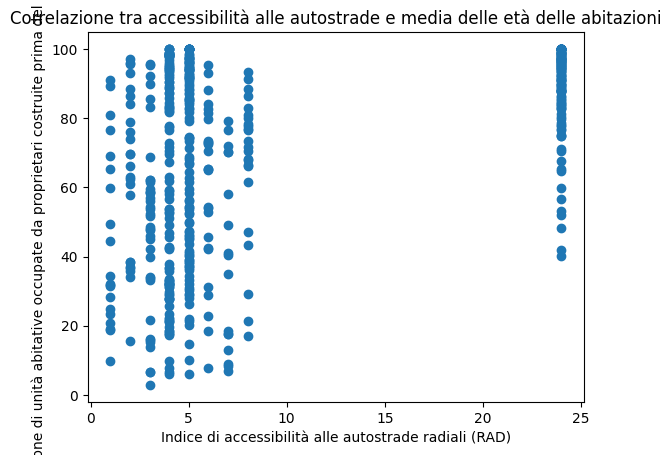


Correlazione tra accessibilità alle autostrade e numero di stanze: -0.20984666776610877


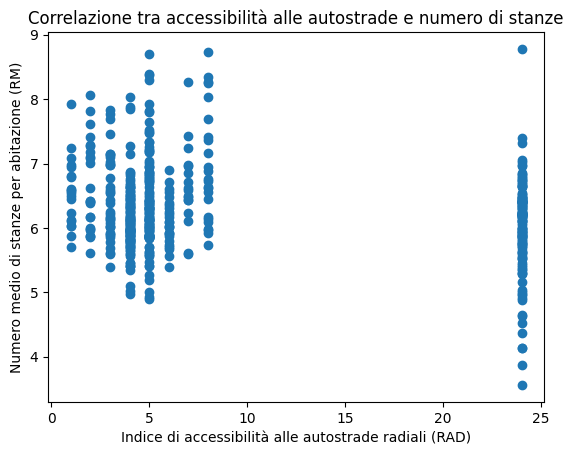


Correlazione tra accessibilità alle autostrade e tasse: 0.9102281885331835


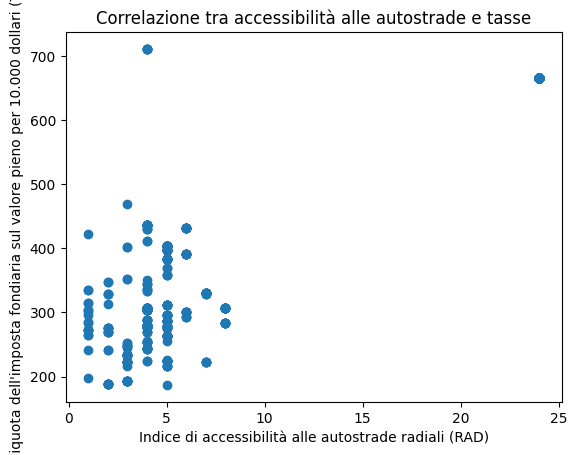


Non esiste una correlazione significativa tra l'accessibilità alle autostrade e la media delle età delle abitazioni.

Non esiste una correlazione significativa tra l'accessibilità alle autostrade e il numero di stanze.

Non esiste una correlazione significativa tra l'accessibilità alle autostrade e le tasse.


In [ ]:
# Calcola la correlazione tra l'accessibilità alle autostrade (RAD) e la media delle età delle abitazioni (AGE)
correlazione_rad_age = boston["rad"].corr(boston["age"])
print("\nCorrelazione tra accessibilità alle autostrade e media delle età delle abitazioni:", correlazione_rad_age)

# Visualizza la correlazione tra l'accessibilità alle autostrade (RAD) e la media delle età delle abitazioni (AGE) con uno scatter plot
plt.scatter(boston["rad"], boston["age"])
plt.xlabel("Indice di accessibilità alle autostrade radiali (RAD)")
plt.ylabel("Proporzione di unità abitative occupate da proprietari costruite prima del 1940 (AGE)")
plt.title("Correlazione tra accessibilità alle autostrade e media delle età delle abitazioni")
plt.show()

# Calcola la correlazione tra l'accessibilità alle autostrade (RAD) e il numero di stanze (RM)
correlazione_rad_rm = boston["rad"].corr(boston["rm"])
print("\nCorrelazione tra accessibilità alle autostrade e numero di stanze:", correlazione_rad_rm)

# Visualizza la correlazione tra l'accessibilità alle autostrade (RAD) e il numero di stanze (RM) con uno scatter plot
plt.scatter(boston["rad"], boston["rm"])
plt.xlabel("Indice di accessibilità alle autostrade radiali (RAD)")
plt.ylabel("Numero medio di stanze per abitazione (RM)")
plt.title("Correlazione tra accessibilità alle autostrade e numero di stanze")
plt.show()

# Calcola la correlazione tra l'accessibilità alle autostrade (RAD) e le tasse (TAX)
correlazione_rad_tax = boston["rad"].corr(boston["tax"])
print("\nCorrelazione tra accessibilità alle autostrade e tasse:", correlazione_rad_tax)

# Visualizza la correlazione tra l'accessibilità alle autostrade (RAD) e le tasse (TAX) con uno scatter plot
plt.scatter(boston["rad"], boston["tax"])
plt.xlabel("Indice di accessibilità alle autostrade radiali (RAD)")
plt.ylabel("Aliquota dell'imposta fondiaria sul valore pieno per 10.000 dollari (TAX)")
plt.title("Correlazione tra accessibilità alle autostrade e tasse")
plt.show()

# Interpretazione del risultato
if abs(correlazione_rad_age) < 1 and abs(correlazione_rad_age) > -1:
    print("\nNon esiste una correlazione significativa tra l'accessibilità alle autostrade e la media delle età delle abitazioni.")
else:
    print("\nEsiste una correlazione tra l'accessibilità alle autostrade e la media delle età delle abitazioni.")
    # Trova la funzione predittiva più idonea per la correlazione tra RAD e AGE
    from sklearn.linear_model import LinearRegression
    X = boston[["rad"]]
    y = boston["age"]
    model = LinearRegression()
    model.fit(X, y)
    print("\nEquazione della retta di regressione per RAD e AGE:", f"y = {model.intercept_:.2f} + {model.coef_[0]:.2f} * x")
    # Visualizza la retta di regressione
    plt.scatter(boston["rad"], boston["age"])
    plt.plot(boston["rad"], model.predict(boston[["rad"]]), color='red')
    plt.xlabel("Indice di accessibilità alle autostrade radiali (RAD)")
    plt.ylabel("Proporzione di unità abitative occupate da proprietari costruite prima del 1940 (AGE)")
    plt.title("Correlazione tra accessibilità alle autostrade e media delle età delle abitazioni con retta di regressione")
    plt.show()

if abs(correlazione_rad_rm) < 1 and abs(correlazione_rad_rm) > -1:
    print("\nNon esiste una correlazione significativa tra l'accessibilità alle autostrade e il numero di stanze.")
else:
    print("\nEsiste una correlazione tra l'accessibilità alle autostrade e il numero di stanze.")
    # Trova la funzione predittiva più idonea per la correlazione tra RAD e RM
    from sklearn.linear_model import LinearRegression
    X = boston[["rad"]]
    y = boston["rm"]
    model = LinearRegression()
    model.fit(X, y)
    print("\nEquazione della retta di regressione per RAD e RM:", f"y = {model.intercept_:.2f} + {model.coef_[0]:.2f} * x")
    # Visualizza la retta di regressione
    plt.scatter(boston["rad"], boston["rm"])
    plt.plot(boston["rad"], model.predict(boston[["rad"]]), color='red')
    plt.xlabel("Indice di accessibilità alle autostrade radiali (RAD)")
    plt.ylabel("Numero medio di stanze per abitazione (RM)")
    plt.title("Correlazione tra accessibilità alle autostrade e numero di stanze con retta di regressione")
    plt.show()

if abs(correlazione_rad_tax) < 1 and abs(correlazione_rad_tax) > -1:
    print("\nNon esiste una correlazione significativa tra l'accessibilità alle autostrade e le tasse.")
else:
    print("\nEsiste una correlazione tra l'accessibilità alle autostrade e le tasse.")
    # Trova la funzione predittiva più idonea per la correlazione tra RAD e TAX
    from sklearn.linear_model import LinearRegression
    X = boston[["rad"]]
    y = boston["tax"]
    model = LinearRegression()
    model.fit(X, y)
    print("\nEquazione della retta di regressione per RAD e TAX:", f"y = {model.intercept_:.2f} + {model.coef_[0]:.2f} * x")
    # Visualizza la retta di regressione
    plt.scatter(boston["rad"], boston["tax"])
    plt.plot(boston["rad"], model.predict(boston[["rad"]]), color='red')
    plt.xlabel("Indice di accessibilità alle autostrade radiali (RAD)")
    plt.ylabel("Aliquota dell'imposta fondiaria sul valore pieno per 10.000 dollari (TAX)")
    plt.title("Correlazione tra accessibilità alle autostrade e tasse con retta di regressione")
    plt.show()


In [ ]:
#Abbiamo un DataFrame di dipendenti: employees_df = pd.DataFrame({ 'employee_id': [101, 102, 103, 104, 105], 'name': ['Alice', 'Bob', 'Charlie', 'David', 'Emma'], 'department_id': [1, 2, 1, 2, 3] })

In [ ]:
#E un DataFrame di dipartimenti: departments_df = pd.DataFrame({ 'department_id': [1, 2, 3], 'department_name': ['HR', 'IT', 'Finance'], 'location': ['New York', 'San Francisco', 'Chicago'] })

In [ ]:
#Unire questi DataFrame in base alla colonna comune department_id, in modo da avere nel risultato informazioni sia sui dipendenti che sui dipartimenti, usando la funzione .merge() • Per ogni DataFrame, trasformare la colonna department_id nell'indice, facendo in modo che la modifica sia permanente; poi unire i due dataset mediante il metodo .join() • Ci sono differenze nel risultato? Quali? Perché?

In [ ]:
employees_df = pd.DataFrame({
    'employee_id': [101, 102, 103, 104, 105],
    'name': ['Alice', 'Bob', 'Charlie', 'David', 'Emma'],
    'department_id': [1, 2, 1, 2, 3]
})
departments_df = pd.DataFrame({
    'department_id': [1, 2, 3],
    'department_name': ['HR', 'IT', 'Finance'],
    'location': ['New York', 'San Francisco', 'Chicago']
})

In [ ]:
# Unire i DataFrame usando .merge()
merged_df = pd.merge(employees_df, departments_df, on='department_id')
print("DataFrame unito con .merge():\n", merged_df)

# Trasformare la colonna department_id nell'indice per entrambi i DataFrame
employees_df.set_index('department_id', inplace=True)
departments_df.set_index('department_id', inplace=True)

# Unire i DataFrame usando .join()
joined_df = employees_df.join(departments_df, how='left')
print("\nDataFrame unito con .join():\n", joined_df)

# Confronto tra i risultati
print("\nDifferenze tra i risultati:")
print("- .merge() crea un nuovo DataFrame con tutte le colonne di entrambi i DataFrame, mantenendo le righe originali.")
print("- .join() unisce i DataFrame basandosi sull'indice, quindi le colonne del secondo DataFrame vengono aggiunte al primo DataFrame.")


DataFrame unito con .merge():
    employee_id     name  department_id department_name       location
0          101    Alice              1              HR       New York
1          103  Charlie              1              HR       New York
2          102      Bob              2              IT  San Francisco
3          104    David              2              IT  San Francisco
4          105     Emma              3         Finance        Chicago

DataFrame unito con .join():
                employee_id     name department_name       location
department_id                                                     
1                      101    Alice              HR       New York
1                      103  Charlie              HR       New York
2                      102      Bob              IT  San Francisco
2                      104    David              IT  San Francisco
3                      105     Emma         Finance        Chicago

Differenze tra i risultati:
- .merge() crea un n

In [ ]:
#Dal database AdventureWorksDW importiamo le tabelle dimemployee e dimemployeesalesterritory come DataFrame • Effettuiamo un join tra i due DataFrame usando le colonne EmployeeKey • Controlliamo la dimensione del DataFrame risultante: è quella attesa? • Importiamo ora la tabella dimsalesterritory ed effettuiamo un join tra questa e il DataFrame risultante della join precedente, usando le colonne SalesTerritoryKey • Su questo DataFrame contare quanti dipendenti ci sono per ogni paese (country) e per ogni regione (region) • Valutiamo la media del BaseRate per ogni paese: ci sono differenze?

In [5]:
!pip install pymysql

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 2.3 MB/s eta 0:00:00


In [6]:
import pymysql

In [10]:
# Configurazione della connessione
host = 'epicode-data-pt-mysql.cvetyjye2qbl.eu-central-1.rds.amazonaws.com'  # Indirizzo del server MySQL
user = 'studente_dapt'  # Nome utente MySQL
password = 'Ep1c0d3!!D4t4**4n4lys1s'  # Password MySQL
database = 'AdventureWorksDW'  # Nome del database a cui collegarsi

# Creazione della connessione al database
connection = pymysql.connect(
        host=host,
        user=user,
        password=password,
        database=database
    )

query1 = "SELECT * FROM dimemployee"
query2 = "SELECT * FROM dimemployeesalesterritory"
query3 = "SELECT * FROM dimsalesterritory"
db_engine = connection.cursor()
df_dimemployee = pd.read_sql_query(query1, connection)
df_dimemployeesalesterritory = pd.read_sql_query(query2, connection)
df_dimsalesterritory = pd.read_sql_query(query3, connection)

<ipython-input-10-92bcb27c395f>:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_dimemployee = pd.read_sql_query(query1, connection)
<ipython-input-10-92bcb27c395f>:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_dimemployeesalesterritory = pd.read_sql_query(query2, connection)
<ipython-input-10-92bcb27c395f>:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_dimsalesterritory = pd.read_sql_query(query3, connection)


In [8]:
# Effettuiamo un join tra i due DataFrame usando le colonne EmployeeKey
merged_df = pd.merge(df_dimemployee, df_dimemployeesalesterritory, on='EmployeeKey')


In [9]:
#Controlliamo la dimensione del DataFrame risultante
print("Dimensioni del DataFrame risultante:", merged_df.shape)


Dimensioni del DataFrame risultante: (39, 29)


In [11]:
# Effettuiamo un join tra il DataFrame risultante e dimsalesterritory usando le colonne SalesTerritoryKey
final_df = pd.merge(merged_df, df_dimsalesterritory, on='SalesTerritoryKey')


In [13]:
print(final_df.head())

   EmployeeKey  ParentEmployeeKey  EmployeeNationalIDAlternateKey  \
0          272              277.0                       502097814   
1          277              277.0                       112432117   
2          286              272.0                        61161660   
3          289              272.0                       987554265   
4          293              272.0                        90836195   

   ParentEmployeeNationalIDAlternateKey FirstName      LastName MiddleName  \
0                           112432117.0   Stephen         Jiang          Y   
1                           112432117.0     Brian       Welcker          S   
2                           502097814.0    Pamela  Ansman-Wolfe          O   
3                           502097814.0     David      Campbell          R   
4                           502097814.0      Tete   Mensa-Annan          A   

   NameStyle                         Title    HireDate  ... SalesPersonFlag  \
0          0  North American Sales Ma

In [14]:
# Contare quanti dipendenti ci sono per ogni paese e regione
dipendenti_per_paese_regione = final_df.groupby(['SalesTerritoryCountry', 'SalesTerritoryRegion'])['EmployeeKey'].count()
print("\nNumero di dipendenti per ogni paese e regione:\n", dipendenti_per_paese_regione)



Numero di dipendenti per ogni paese e regione:
 SalesTerritoryCountry  SalesTerritoryRegion
Australia              Australia               3
Canada                 Canada                  4
France                 France                  4
Germany                Germany                 3
United Kingdom         United Kingdom          3
United States          Central                 5
                       Northeast               3
                       Northwest               5
                       Southeast               4
                       Southwest               5
Name: EmployeeKey, dtype: int64


In [20]:
# prompt: calcola il base rate all'interno di final_df. ci sono differenze significative? prova con test-t su tutti gli stati

# Calcola la media del BaseRate per ogni paese
media_baserate_per_paese = final_df.groupby('SalesTerritoryCountry')['BaseRate'].mean()
print("\nMedia del BaseRate per ogni paese:\n", media_baserate_per_paese)

# Importa la libreria per il test t
from scipy import stats

# Crea una lista di tutti i paesi
paesi = final_df['SalesTerritoryCountry'].unique()

# Esegui il test t per tutti i paesi
for paese in paesi:
  # Seleziona i dati per il paese corrente
  dati_paese = final_df[final_df['SalesTerritoryCountry'] == paese]['BaseRate']
  # Calcola la media del BaseRate per il paese corrente
  media_baserate_paese = dati_paese.mean()
  # Esegui il test t
  t_stat, p_value = stats.ttest_ind(dati_paese, final_df['BaseRate'])
  print(f"\nTest t per il paese {paese}:")
  print(f"  Statistica t: {t_stat:.2f}")
  print(f"  P-value: {p_value:.3f}")
  # Verifica se il p-value è inferiore al livello di significatività (ad esempio, 0.05)
  if p_value < 0.05:
    print("  Differenza significativa nel BaseRate per questo paese.")
  else:
    print("  Nessuna differenza significativa nel BaseRate per questo paese.")



Media del BaseRate per ogni paese:
 SalesTerritoryCountry
Australia         47.764433
Canada            41.592550
France            41.592550
Germany           47.764433
United Kingdom    47.764433
United States     39.909309
Name: BaseRate, dtype: float64

Test t per il paese United States:
  Statistica t: -0.39
  P-value: 0.697
  Nessuna differenza significativa nel BaseRate per questo paese.

Test t per il paese Canada:
  Statistica t: -0.04
  P-value: 0.966
  Nessuna differenza significativa nel BaseRate per questo paese.

Test t per il paese France:
  Statistica t: -0.04
  P-value: 0.966
  Nessuna differenza significativa nel BaseRate per questo paese.

Test t per il paese Germany:
  Statistica t: 0.46
  P-value: 0.651
  Nessuna differenza significativa nel BaseRate per questo paese.

Test t per il paese Australia:
  Statistica t: 0.46
  P-value: 0.651
  Nessuna differenza significativa nel BaseRate per questo paese.

Test t per il paese United Kingdom:
  Statistica t: 0.46
  P-v